**DATA SETUP**  

*Where applicable, use test_size=.30, random_state=4444. This will permit comparison of results across users.*  

Exercises 1-10: congressional votes Congressional Voting Records Dataset. Download the congressional votes data. These are votes of U.S. House of Representatives Congressmen on 16 key issues in 1984. Read the description of the fields and download the data: house-votes-84.data. We will try to see if we can predict the house members' party based on their votes. We will also use some of the general machine learning tools we learned (a bit more efficiently this time).    

In [3]:
#Import necessary stuff to start
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.dates as dte
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.learning_curve import learning_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

%matplotlib inline

**Exercise 5.1**

Load the data into a pandas dataframe. Replace 'y's with 1s, 'n's with 0s. Now, almost every representative has a ?. This represents the absence of a vote (they were absent or some other similar reason). If we dropped all the rows that had a ?, we would throw out most of our data. Instead, we will replace ? with the best guess in the Bayesian sense: in the absence of any other information, we will say that the probability of the representative saying YES is the ratio of others that said YES over the whole votes. So, convert each ? to this probability (when yes=1 and no=0, this is the mean of the column).

In [30]:
#Import the data 
congress = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', delimiter = ",", names = ['party', 'handicapped-infants', 'water-project-cost-sharing', 'adoption-of-the-budget-resolution', 'physician-fee-freeze', 'el-salvador-aid', 'religious-groups-in-schools', 'anti-satellite-test-ban', 'aid-to-nicaraguan-contras', 'mx-missile', 'immigration', 'synfuels-corporation-cutback', 'education-spending', 'superfund-right-to-sue', 'crime', 'duty-free-exports', 'export-administration-act-south-africa'])

In [31]:
congress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
party                                     435 non-null object
handicapped-infants                       435 non-null object
water-project-cost-sharing                435 non-null object
adoption-of-the-budget-resolution         435 non-null object
physician-fee-freeze                      435 non-null object
el-salvador-aid                           435 non-null object
religious-groups-in-schools               435 non-null object
anti-satellite-test-ban                   435 non-null object
aid-to-nicaraguan-contras                 435 non-null object
mx-missile                                435 non-null object
immigration                               435 non-null object
synfuels-corporation-cutback              435 non-null object
education-spending                        435 non-null object
superfund-right-to-sue                    435 non-null object
crime                      

In [51]:
congress = congress.replace(to_replace='y', value=1)
congress = congress.replace(to_replace='n', value=0)
congress = congress.replace(to_replace='?', value=np.nan)

In [54]:
congress = congress.fillna(congress.mean())

In [58]:
congress.head()

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,0.00000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,0.362319,1.000000,1.0,1.0,0.0,1.000000
1,republican,0.00000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,0.0,0.000000,1.000000,1.0,1.0,0.0,0.812689
2,democrat,0.44208,1.0,1.0,0.417453,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.0,1.0,0.0,0.000000
3,democrat,0.00000,1.0,1.0,0.000000,0.504762,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.0,0.0,0.0,1.000000
4,democrat,1.00000,1.0,1.0,0.000000,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.423267,1.0,1.0,1.0,1.000000


**Exercise 5.2**

Split the data into a test and training set.

In [75]:
y = congress.iloc[:, 0]
y = y.replace(to_replace='republican', value=1)
y = y.replace(to_replace='democrat', value=0)
X = congress.iloc[:, 1:]

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4444)

In [78]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304 entries, 243 to 41
Data columns (total 16 columns):
handicapped-infants                       304 non-null float64
water-project-cost-sharing                304 non-null float64
adoption-of-the-budget-resolution         304 non-null float64
physician-fee-freeze                      304 non-null float64
el-salvador-aid                           304 non-null float64
religious-groups-in-schools               304 non-null float64
anti-satellite-test-ban                   304 non-null float64
aid-to-nicaraguan-contras                 304 non-null float64
mx-missile                                304 non-null float64
immigration                               304 non-null float64
synfuels-corporation-cutback              304 non-null float64
education-spending                        304 non-null float64
superfund-right-to-sue                    304 non-null float64
crime                                     304 non-null float64
duty-free-ex

**Exercise 5.3**

Using scikit.learn's KNN algorithm, train a model that predicts the party (republican/democrat): from sklearn.neighbors import KNeighborsClassifier. Try it with a lot of different k values (number of neighbors), from 1 to 20, and on the test set calculate the accuracy (number of correct predictions / number of all predictions) for each k. You can use this to calculate accuracy: from sklearn.metrics import accuracy_score. Which k value gives the highest accuracy?

> **I find that three Ks give the same accuracy score of .931298: K = 6, 9, and 10**

In [130]:
neighbors = range(1, 21)
accuracy = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    ypred_knn = knn.predict(X_test)
    accuracy.append(accuracy_score(y_test, ypred_knn))

In [131]:
knn_acc = pd.DataFrame(zip(neighbors, accuracy))
knn_acc.sort_values(1, ascending=False)

,0,1
5,6,0.931298
8,9,0.931298
9,10,0.931298
10,11,0.923664
13,14,0.923664
16,17,0.923664
15,16,0.923664
7,8,0.923664
14,15,0.923664
11,12,0.923664


**Exercise 5.4**

Make a similar model but with LogisticRegression instead, calculate test accuracy.
> **It looks like this is slightly better than even the best KNN classifier**

In [169]:
logit = LogisticRegression()
logit.fit(X_train, y_train)
ypred_logit = logit.predict(X_test)

logit_acc = accuracy_score(y_test, ypred_logit)
print logit_acc

0.93893129771


In [240]:
#Here I want to check which ones it's getting wrong because some of the other classifiers return the exact same result.
#So, do they get the same ones wrong?
wrong_lo = pd.DataFrame([y_test != ypred_logit])
wrong_lo = wrong_lo.loc[:, (wrong_lo != False).any(axis=0)]
wrong_lo

,355,388,161,107,176,364,71,393
party,True,True,True,True,True,True,True,True


**Exercise 5.5**

Make a bar graph of democrats and republicans. How many of each are there? Make a very simple predictor that predicts 'democrat' for every incoming example. Just make a function that takes in an X --an array or matrix with input examples--, and returns an array of the same length as X, where each value is 'democrat'. For example, if X is three rows, your function should return ['democrat','democrat','democrat']. Make a y_predicted vector using this and measure its accuracy. Do the same with predicting 'republican' all the time and measure its accuracy.

> **There are 168 Republicans and 267 Democrats**

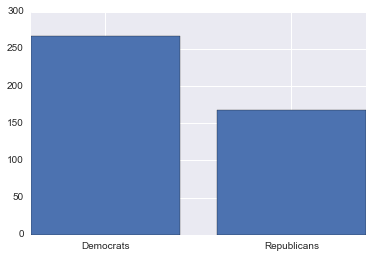

In [102]:
#First make the bar graph
party = [1, 0]
labels = ['Republicans', 'Democrats']
members = [(y==1).sum(), (y==0).sum()]
plt.bar(party, members, align='center')
plt.xticks(party, labels)
plt.show();

In [121]:
#Now make predictor functions: Since I have to convert everything to 0s and 1s to make predictions anyway, 
# I am going to just generate 0s and 1s here for greater efficiency

def predict_dem(X):
    dems = []
    i=1
    while i <= len(X):
        dems.append(0)
        i+=1
    return np.asarray(dems)

def predict_repub(X):
    repubs = []
    i=1
    while i <= len(X):
        repubs.append(1)
        i+=1
    return np.asarray(repubs)

In [126]:
ypred_dems = predict_dem(X_test)
ypred_repubs = predict_repub(X_test)

dems_acc = accuracy_score(y_test, ypred_dems)
repubs_acc = accuracy_score(y_test, ypred_repubs)

print dems_acc
print repubs_acc

0.587786259542
0.412213740458


**Exercise 5.6**

Plot the accuracies as a function of k. Since k only matters for KNN, your logistic regression accuracy, 'democrat' predictor accuracy and 'republican' predictor accuracy will stay the same over all k, so each of these three will be a horizontal line. But the KNN accuracy will change with k.

In [138]:
logit_acc

0.93893129770992367

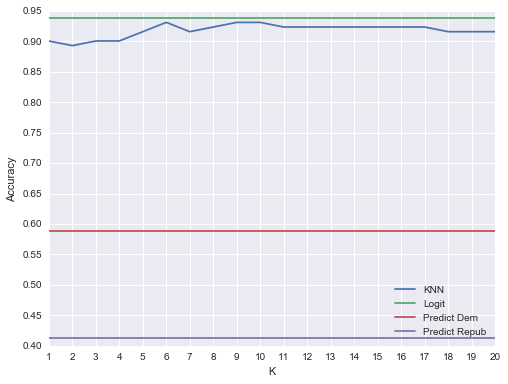

In [157]:
#First create arrays of length 20 for the ones that don't vary
def list20(accuracy_score):
    i = 1
    list = []
    while i <=20:
        list.append(accuracy_score)
        i += 1
    return list    
    
#Now plot the results
plt.figure(figsize = (8,6))
plt.plot(knn_acc[0], knn_acc[1], label = 'KNN')
plt.plot(knn_acc[0], list20(logit_acc), label = 'Logit')
plt.plot(knn_acc[0], list20(dems_acc), label = 'Predict Dem')
plt.plot(knn_acc[0], list20(repubs_acc), label = 'Predict Repub')
plt.ylabel("Accuracy")
plt.xlabel("K")
plt.xlim((1.0, 20.0))
plt.ylim((.4, .95))
plt.legend(loc='lower right')
plt.xticks(np.arange(1, 21, 1.0));
plt.yticks(np.arange(.4, .96, .05));

**Exercise 5.7**

Plot a learning curve for the logistic regression model. But instead of going through the painstaking steps of doing it yourself, use this function: from sklearn.learning_curve import learning_curve

This will give you the m, training errors and testing errors. All you need to do is plot them. You don't even need to give it separate training/test sets. It will do crossvalidation all by itself. Easy, isn't it? : ) Remember, since it does cross-validation, it doesn't have a single training error or test error per m value. Instead, it has one for each fold (separate partition) of the cross validation. A good idea is to take the mean of these errors from different folds. This gives you a meaningful single number per m. What I mean is that doing something like:  

train_cv_err = np.mean(train_err, axis=1)  
test_cv_err = np.mean(ts_err, axis=1)  

Before plotting m vs train_cv_err and m vs test_cv_err, where train_err and test_err are the vectors returned by the learning curve function. The np.mean(...., axis=1) means take the mean along axis 1 (axis 1 is the columns axis-- for each row, you have a bunch of columns, each corresponding to a cross validation fold, you are averaging these columns for each row). Draw the learning curve for KNN with the best k value as well.

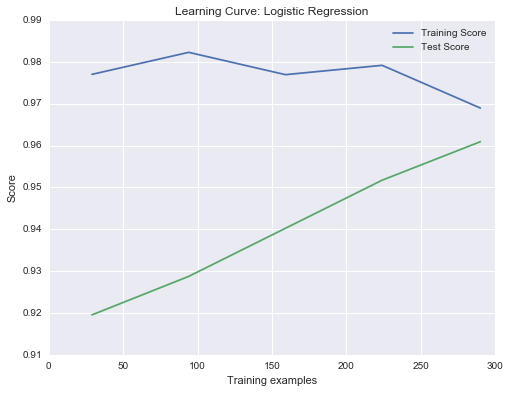

In [167]:
#Logistic learning curve
train_sizes, train_scores, test_scores = learning_curve(LogisticRegression(), X, y)

train_cv_err = np.mean(train_scores, axis = 1)
test_cv_err = np.mean(test_scores, axis = 1)


plt.figure(figsize = (8,6))
plt.plot(train_sizes, train_cv_err, label = 'Training Score')
plt.plot(train_sizes, test_cv_err, label = 'Test Score')
plt.legend(loc='best')
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve: Logistic Regression");

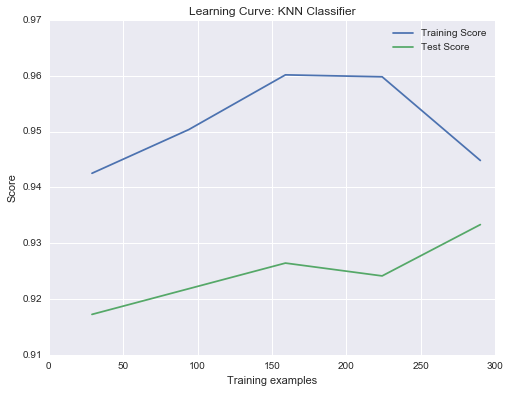

In [168]:
#KNN learning curve (I use 6 neighbors even though 6, 9, and 10 were all alike)
train_sizes, train_scores, test_scores = learning_curve(KNeighborsClassifier(n_neighbors=6), X, y)

train_cv_err = np.mean(train_scores, axis = 1)
test_cv_err = np.mean(test_scores, axis = 1)


plt.figure(figsize = (8,6))
plt.plot(train_sizes, train_cv_err, label = 'Training Score')
plt.plot(train_sizes, test_cv_err, label = 'Test Score')
plt.legend(loc='best')
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve: KNN Classifier");

**Exercise 5.8**

This is a preview of many other classification algorithms that we will go over. Scikit.learn has the same interface for all of these, so you can use them exactly the same way as you did LogisticRegression and KNeighborsClassifier. Use each of these to classify your data and print the test accuracy of each:  

*Gaussian Naive Bayes*  

from sklearn.naive_bayes import GaussianNB  

*SVM (Support Vector Machine) Classifier*  

from sklearn.svm import SVC  

*Decision Tree*  

from sklearn.tree import DecisionTreeClassifier  

*Random Forest*  

from sklearn.ensemble import RandomForestClassifier  

In [188]:
#Gaussian Naive Bayes
nb = GaussianNB()
nbfit = nb.fit(X_train, y_train)
ypred_nb = nb.predict(X_test)

nb_acc = accuracy_score(y_test, ypred_nb)
print nb_acc

#This returns the EXACT same figure as the logistic regression: 0.93893129771
#This raises the question: are they getting the same ones wrong?

0.93893129771


In [238]:
wrong_nb = pd.DataFrame([y_test != ypred_nb])
wrong_nb = wrong_nb.loc[:, (wrong_nb != False).any(axis=0)]
wrong_nb

,355,388,107,176,363,281,71,393
party,True,True,True,True,True,True,True,True


In [187]:
#Support Vector Machine

svc = SVC()
svcfit = svc.fit(X_train, y_train)
ypred_svc = svc.predict(X_test)

svc_acc = accuracy_score(y_test, ypred_svc)
print svc_acc

0.954198473282


In [186]:
#Decision Tree

dt = DecisionTreeClassifier()
dtfit = dt.fit(X_train, y_train)
ypred_dt = dt.predict(X_test)

dt_acc = accuracy_score(y_test, ypred_dt)
print dt_acc

#This ALSO returns the EXACT same figure as the logistic regression: 0.93893129771
#Again check if they are getting the same ones wrong?

0.93893129771


In [241]:
wrong_dt = pd.DataFrame([y_test != ypred_dt])
wrong_dt = wrong_dt.loc[:, (wrong_dt != False).any(axis=0)]
wrong_dt

,388,363,364,71,276,393,103,410
party,True,True,True,True,True,True,True,True


In [185]:
#Random Forest

rf = RandomForestClassifier()
rffit = rf.fit(X_train, y_train)
ypred_rf = rf.predict(X_test)

rf_acc = accuracy_score(y_test, ypred_rf)
print rf_acc

#This ALSO returns the EXACT same figure as the NB and DT and logistic regression: 0.93893129771
#Again check if they are getting the same ones wrong?

0.93893129771


In [242]:
wrong_rf = pd.DataFrame([y_test != ypred_rf])
wrong_rf = wrong_rf.loc[:, (wrong_rf != False).any(axis=0)]
wrong_rf

,355,161,363,364,281,71,393,392
party,True,True,True,True,True,True,True,True


In [243]:
#Compare which observations the four models with the same accuracy scores got wrong
#They're similar, but they do get some different ones wrong, so I gather I didn't screw up the modeling
print wrong_lo
print wrong_nb
print wrong_dt
print wrong_rf

        355   388   161   107   176   364   71    393
party  True  True  True  True  True  True  True  True
        355   388   107   176   363   281   71    393
party  True  True  True  True  True  True  True  True
        388   363   364   71    276   393   103   410
party  True  True  True  True  True  True  True  True
        355   161   363   364   281   71    393   392
party  True  True  True  True  True  True  True  True


**Exercise 5.9**

There is actually a way to do cross validation quickly to get your accuracy results for an algorithm, without separating training and test yourself: from sklearn.cross_validation import cross_val_score.  

Just like the learning_curve function, this takes a classifier object, X and Y. Returns accuracy (or whatever score you prefer by using the scoring keyword argument). Of course, it will return a score for each cross validation fold, so to get the generalized accuracy, you need to take the mean of what it returns.  

Use this function to calculate the cross validation score of each of the classifiers you tried before.

In [189]:
#Logit
logit_score = np.mean(cross_val_score(LogisticRegression(), X, y, cv=5))
print logit_score

0.958483997959


In [190]:
#KNN
knn_score = np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=6), X, y, cv=5))
print knn_score

0.93332604311


In [193]:
#Naive Bayes
nb_score = np.mean(cross_val_score(GaussianNB(), X, y, cv=5))
print nb_score

0.940144224928


In [194]:
#Support Vector Machine
svm_score = np.mean(cross_val_score(SVC(), X, y, cv=5))
print svm_score

0.953965274234


In [195]:
#Decision Tree
dt_score = np.mean(cross_val_score(DecisionTreeClassifier(), X, y, cv=5))
print dt_score

0.937765181891


In [196]:
#Random Forest
rf_score = np.mean(cross_val_score(RandomForestClassifier(), X, y, cv=5))
print rf_score

0.949340234745


**Exercise 5.10**

Instead of 'democrat' or 'republican', can you predict the vote of a representative based on their other votes?  

Reload the data from scratch. Convert y-->1, n-->0.

Choose one vote. Build a classifier (logistic regression or KNN), that uses the other votes (do not use the party as a feature) to predict if the vote will be 1 or 0.  

Convert each ? to the mode of the column (if a senator has not voted, make their vote 1 if most others voted 1, make it 0 if most others voted 0).  

Calculate the cross validation accuracy of your classifier for predicting how each representative will vote on the issue.  

In [244]:
#Import the data again
congress2 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', delimiter = ",", names = ['party', 'handicapped-infants', 'water-project-cost-sharing', 'adoption-of-the-budget-resolution', 'physician-fee-freeze', 'el-salvador-aid', 'religious-groups-in-schools', 'anti-satellite-test-ban', 'aid-to-nicaraguan-contras', 'mx-missile', 'immigration', 'synfuels-corporation-cutback', 'education-spending', 'superfund-right-to-sue', 'crime', 'duty-free-exports', 'export-administration-act-south-africa'])

In [245]:
congress2 = congress2.drop('party', axis = 1)
congress2 = congress2.replace(to_replace='y', value=1)
congress2 = congress2.replace(to_replace='n', value=0)
congress2 = congress2.replace(to_replace='?', value=np.nan)

In [248]:
#Really strange that to fill nan values with the mode it's not the same syntax as for the mean
congress2 = congress2.fillna(congress2.mode().ix[0])

In [249]:
print congress2.info()
congress2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 16 columns):
handicapped-infants                       435 non-null float64
water-project-cost-sharing                435 non-null float64
adoption-of-the-budget-resolution         435 non-null float64
physician-fee-freeze                      435 non-null float64
el-salvador-aid                           435 non-null float64
religious-groups-in-schools               435 non-null float64
anti-satellite-test-ban                   435 non-null float64
aid-to-nicaraguan-contras                 435 non-null float64
mx-missile                                435 non-null float64
immigration                               435 non-null float64
synfuels-corporation-cutback              435 non-null float64
education-spending                        435 non-null float64
superfund-right-to-sue                    435 non-null float64
crime                                     435 non-null float64
duty-free-exp

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
1,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
2,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0


In [256]:
#Set target and features
#Choose y as Aid to Nicaraguan Contras
y_contras = congress2.iloc[:, 7]
X_contras = congress2.drop('aid-to-nicaraguan-contras', axis = 1).copy()

In [257]:
#Logit
logit_contras = np.mean(cross_val_score(LogisticRegression(), X_contras, y_contras, cv=5))
print logit_contras

0.89627591067


**It looks like we can predict fairly well with logistic regression how a member would vote on aid to the contras based on their other votes (.896).  We can't predict this quite as well as we can predict the members' party, but still pretty impressive.**

**Exercise 5.11**

Back to movie data! Choose one categoric feature to predict. I chose MPAA Rating, but genre, month, etc. are all decent choices. If you don't have any non-numeric features, you can make two bins out of a numeric one (like "Runtime>100 mins" and "Runtime<=100 mins").  

Make a bar graph of how many of each movie there is in the data. For example, with Ratings, show how many G, PG, PG-13, R movies there are, etc. (basically a histogram of your labels).  

Predict your outcome variable (labels) using KNN and logistic regression. Calculate their accuracies.  

Make a baseline stupid predictor that always predicts the label that is present the most in the data. Calculate its accuracy on a test set. How much better do KNN and logistic regression do versus the baseline?  

What are the coefficients of logistic regression? Which features affect the outcome how?

In [258]:
#Import the Challenge 2 & 3 movies data from '2013_movies.csv'
movies = pd.read_csv('../challenges/02-pandas/2013_movies.csv', parse_dates=['ReleaseDate'])

In [276]:
#Generate df with target and feature variables I will include in my model
movies_df = movies[['Rating', 'DomesticTotalGross', 'Runtime', 'Budget']].dropna(how='any')
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89 entries, 0 to 99
Data columns (total 4 columns):
Rating                89 non-null object
DomesticTotalGross    89 non-null int64
Runtime               89 non-null int64
Budget                89 non-null float64
dtypes: float64(1), int64(2), object(1)
memory usage: 3.5+ KB


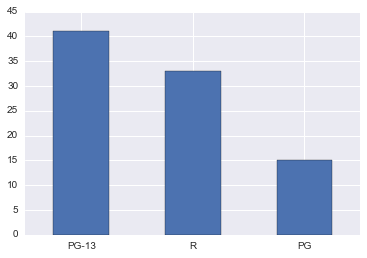

In [292]:
pd.value_counts(movies_df.Rating).plot(kind="bar", rot=0);

#Note no G movies because the only couple in the dataset had no budget information

In [293]:
y11 = movies_df.iloc[:, 0]
X11 = movies_df.iloc[:, 1:]

In [294]:
X11_train, X11_test, y11_train, y11_test = train_test_split(X11, y11, test_size=0.3, random_state=4444)

In [295]:
neighbors = range(1, 21)
accuracy = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X11_train, y11_train)
    ypred11_knn = knn.predict(X11_test)
    accuracy.append(accuracy_score(y11_test, ypred11_knn))

In [296]:
knn_acc = pd.DataFrame(zip(neighbors, accuracy))
knn_acc.sort_values(1, ascending=False)

,0,1
13,14,0.518519
3,4,0.481481
2,3,0.444444
4,5,0.444444
7,8,0.444444
12,13,0.444444
10,11,0.407407
5,6,0.407407
6,7,0.407407
8,9,0.407407


In [297]:
logit11 = LogisticRegression()
logit11.fit(X11_train, y11_train)
ypred11_logit = logit11.predict(X11_test)

logit11_acc = accuracy_score(y11_test, ypred11_logit)
print logit11_acc
print logit11.coef_

0.481481481481
[[ -9.31976740e-09  -1.04210267e-13  -3.99723246e-09]
 [ -3.93653307e-09  -5.51148928e-14   9.62798957e-09]
 [  5.08501166e-09   1.18139138e-13  -2.11481432e-08]]


In [323]:
#Record the coefficients
for i in range(len(list(logit11.coef_[0]))):
    c1_beta = logit11.coef_[0][i]
    c2_beta = logit11.coef_[1][i]
    c3_beta = logit11.coef_[2][i]
    print(X11.columns[i],' c1_beta:', np.round(logit11.coef_[0][i], decimals=8), 'c2_beta:',np.round(logit11.coef_[1][i], decimals=8), 'c3_beta:',np.round(logit11.coef_[2][i], decimals=8))

('DomesticTotalGross', ' c1_beta:', -1e-08, 'c2_beta:', -0.0, 'c3_beta:', 1e-08)
('Runtime', ' c1_beta:', -0.0, 'c2_beta:', -0.0, 'c3_beta:', 0.0)
('Budget', ' c1_beta:', -0.0, 'c2_beta:', 1e-08, 'c3_beta:', -2e-08)


In [299]:
#Now make predictor functions for always PG-13

def predict_pg13(X):
    pg13 = []
    i=1
    while i <= len(X):
        pg13.append('PG-13')
        i+=1
    return np.asarray(pg13)

In [300]:
#Test the baseline predictor's accuracy
ypred_pg13 = predict_pg13(X11_test)

pg13_acc = accuracy_score(y11_test, ypred_pg13)

print pg13_acc

0.444444444444


**Interpretation**  
In this case the baseline predictor of PG-13 is accurate 44% of the time on the test set.  Logistic regression is only slightly better at about 48%, and KNN (best, at 14 neighbors) gets up to almost 52%.  So the three features in my model aren't particularly great at predicting movie rating.

As for the coefficients on the logistic regression, there are three coefficients given per feature: one each for the three categories in the data, as compared to the others (taken together).  I haven't been able to figure out which class is which or what the p-values are (from what I can tell I 'd have to code these myself).  The interpretation of the coefficients depends on the values of the other variables in the model, but very roughly it looks like higher levels of all three variables may reduce the likelihood of class 1.  Meanwhile, higher budgets along with shorter runtimes and lower levels of Domestic Total Gross are potentially affiliated with greater odds of class 2.  Finally, longer runtimes and higher Domestic Total Gross may be associated with higher odds of class 3, as may lower budgets.  

**Exercise 5.12**

Now you are a classification master. The representative votes dataset only had 0s and 1s. Let's just swiftly tackle the breast cancer surgery data.  

Get it from here: Haberman Survival Dataset  

    What is the average and standard deviation of the age of all of the patients?  
    What is the average and standard deviation of the age of those patients that survived 5 or more years after surgery?  
    What is the average and standard deviation of the age of those patients who survived fewer than 5 years after surgery?  
    Plot a histogram of the ages side by side with a histogram of the number of axillary nodes.  
    What is the earliest year of surgery in this dataset?  
    What is the most recent year of surgery?  
    Use logistic regression to predict survival after 5 years. How well does your model do?  
    What are the coefficients of logistic regression? Which features affect the outcome how?  
    Draw the learning curve for logistic regression in this case.  


In [6]:
haberman = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data', delimiter = ",", names = ['patient-age', 'operation-year', 'nodes-detected', 'survival-status'])

In [7]:
haberman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
patient-age        306 non-null int64
operation-year     306 non-null int64
nodes-detected     306 non-null int64
survival-status    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


In [326]:
#Patient age -- average & std deviation
print np.mean(haberman['patient-age'])
print np.std(haberman['patient-age'])

52.4575163399
10.7857852036


In [338]:
#Average age and standard deviation for those who survived 5+ years post-surgery
print 'Age,', haberman['patient-age'][haberman['survival-status'] == 1].mean()
print 'Standard Deviation (Age),', haberman['patient-age'][haberman['survival-status'] == 1].std()

Age, 52.0177777778
Standard Deviation (Age), 11.0121541799


In [339]:
#Average age and standard deviation for those who survived fewer than 5 years post-surgery
print 'Age,', haberman['patient-age'][haberman['survival-status'] == 2].mean()
print 'Standard Deviation (Age),', haberman['patient-age'][haberman['survival-status'] == 2].std()

Age, 53.6790123457
Standard Deviation (Age), 10.1671372083


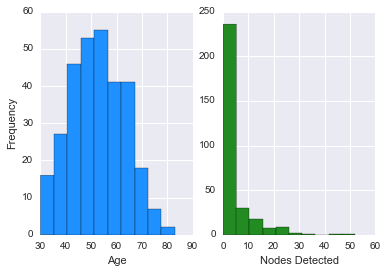

In [353]:
#Plot a histogram of the ages side by side with a histogram of the number of axillary nodes. 
plt.figure(1)
plt.subplot(121)
plt.hist(haberman['patient-age'], color='dodgerblue')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.subplot(122)
plt.hist(haberman['nodes-detected'], color='forestgreen')
plt.xlabel('Nodes Detected');

In [340]:
#Earliest surgery year
haberman['operation-year'].min()  #Result is 1958

58

In [341]:
#Most recent surgery year
haberman['operation-year'].max()  #Result is 1969

69

In [357]:
#Use logistic regression to predict survival after 5 years
X_hab = haberman.iloc[:, 0:3]
y_hab = haberman.iloc[:, 3]

Xhab_train, Xhab_test, yhab_train, yhab_test = train_test_split(X_hab, y_hab, test_size=0.3, random_state=4444)

logit_hab = LogisticRegression()
logit_hab.fit(Xhab_train, yhab_train)
ypred_hab = logit_hab.predict(Xhab_test)

logit_hab_acc = accuracy_score(yhab_test, ypred_hab)
print logit_hab_acc

0.815217391304


In [364]:
for i in range(len(list(logit_hab.coef_[0]))):
    beta = logit_hab.coef_[0][i]
    print(X_hab.columns[i],' beta:',logit_hab.coef_[0][i])

('patient-age', ' beta:', 0.015551502481860288)
('operation-year', ' beta:', -0.028992790586247961)
('nodes-detected', ' beta:', 0.071361965504665614)


**Discussion**
The model is accurate 81.5% of the time.  It looks as if an older patient and a higher number of nodes detected may encourage earlier death (in this case, 2, the code for fewer than 5 years survival). In contrast, a more recent operation year may encourage a longer survival time.

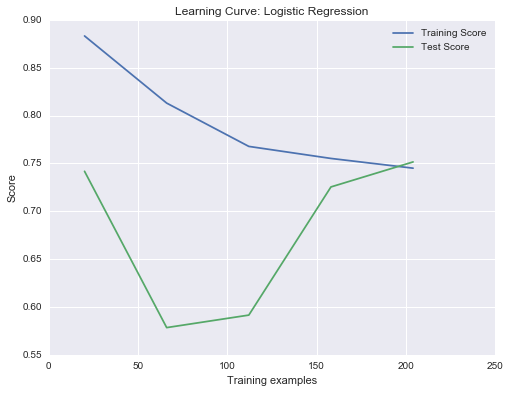

In [366]:
#Logistic learning curve
train_sizes, train_scores, test_scores = learning_curve(LogisticRegression(), X_hab, y_hab)

train_cv_err = np.mean(train_scores, axis = 1)
test_cv_err = np.mean(test_scores, axis = 1)


plt.figure(figsize = (8,6))
plt.plot(train_sizes, train_cv_err, label = 'Training Score')
plt.plot(train_sizes, test_cv_err, label = 'Test Score')
plt.legend(loc='best')
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve: Logistic Regression");